In [ ]:
'''
1. 데이터랩 API확인
2. 요청 URL 및 전문확인
3. request > response > JSON
'''

In [1]:
import pandas as pd
import requests, json

In [26]:
CLIENT_ID, CLIENT_SECRET = 'p1dw5t8tkTzct2dLbwmP', 'kIAz0SXshY'
url = 'https://openapi.naver.com/v1/datalab/search'
params = {
    'startDate':'2018-01-01',
    'endDate':'2022-01-31',
    'timeUnit':'month',
    'keywordGroups':[
        {'groupName':'트위터', 'keywords':['트위터', '트윗']},
        {'groupName':'페이스북', 'keywords':['페이스북', '페북']},
        {'groupName':'인스타그램', 'keywords':['인스타그램', '인스타']},
    ]
}

headers = {
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': CLIENT_ID,
    'X-Naver-Client-Secret': CLIENT_SECRET,
}

response = requests.post(url, json.dumps(params), headers=headers)
response

<Response [200]>

In [17]:
response.json()

{'startDate': '2020-01-01',
 'endDate': '2022-07-31',
 'timeUnit': 'month',
 'results': [{'title': '트위터',
   'keywords': ['트위터', '트윗'],
   'data': [{'period': '2020-01-01', 'ratio': 25.47351},
    {'period': '2020-02-01', 'ratio': 24.93006},
    {'period': '2020-03-01', 'ratio': 29.45491},
    {'period': '2020-04-01', 'ratio': 29.03037},
    {'period': '2020-05-01', 'ratio': 33.3978},
    {'period': '2020-06-01', 'ratio': 30.57936},
    {'period': '2020-07-01', 'ratio': 32.66912},
    {'period': '2020-08-01', 'ratio': 30.71279},
    {'period': '2020-09-01', 'ratio': 31.67766},
    {'period': '2020-10-01', 'ratio': 33.13889},
    {'period': '2020-11-01', 'ratio': 31.07682},
    {'period': '2020-12-01', 'ratio': 34.18517},
    {'period': '2021-01-01', 'ratio': 34.80564},
    {'period': '2021-02-01', 'ratio': 31.88589},
    {'period': '2021-03-01', 'ratio': 34.07623},
    {'period': '2021-04-01', 'ratio': 36.40083},
    {'period': '2021-05-01', 'ratio': 36.50058},
    {'period': '2021-06-

In [27]:
data = response.json()['results']    # parsing 
data

[{'title': '트위터',
  'keywords': ['트위터', '트윗'],
  'data': [{'period': '2018-01-01', 'ratio': 14.59502},
   {'period': '2018-02-01', 'ratio': 13.0238},
   {'period': '2018-03-01', 'ratio': 12.97953},
   {'period': '2018-04-01', 'ratio': 12.82991},
   {'period': '2018-05-01', 'ratio': 13.05391},
   {'period': '2018-06-01', 'ratio': 13.34512},
   {'period': '2018-07-01', 'ratio': 13.02773},
   {'period': '2018-08-01', 'ratio': 13.45399},
   {'period': '2018-09-01', 'ratio': 12.83755},
   {'period': '2018-10-01', 'ratio': 13.05677},
   {'period': '2018-11-01', 'ratio': 12.77338},
   {'period': '2018-12-01', 'ratio': 12.86931},
   {'period': '2019-01-01', 'ratio': 13.31172},
   {'period': '2019-02-01', 'ratio': 11.74776},
   {'period': '2019-03-01', 'ratio': 11.82313},
   {'period': '2019-04-01', 'ratio': 12.32991},
   {'period': '2019-05-01', 'ratio': 12.43771},
   {'period': '2019-06-01', 'ratio': 13.29913},
   {'period': '2019-07-01', 'ratio': 14.00593},
   {'period': '2019-08-01', 'ratio

In [28]:
df = pd.DataFrame({
    'date': [period['period'] for period in data[0]['data']],
    'twitter': [ratio['ratio'] for ratio in data[0]['data']],
    'instagram': [ratio['ratio'] for ratio in data[1]['data']],
    'facebook': [ratio['ratio'] for ratio in data[2]['data']],
})

df.head()

,date,twitter,instagram,facebook
0,2018-01-01,14.59502,97.80481,23.41982
1,2018-02-01,13.02380,89.05814,22.53544
2,2018-03-01,12.97953,98.84292,25.39880
3,2018-04-01,12.82991,100.00000,26.55983
4,2018-05-01,13.05391,92.23588,28.60035


<AxesSubplot:>

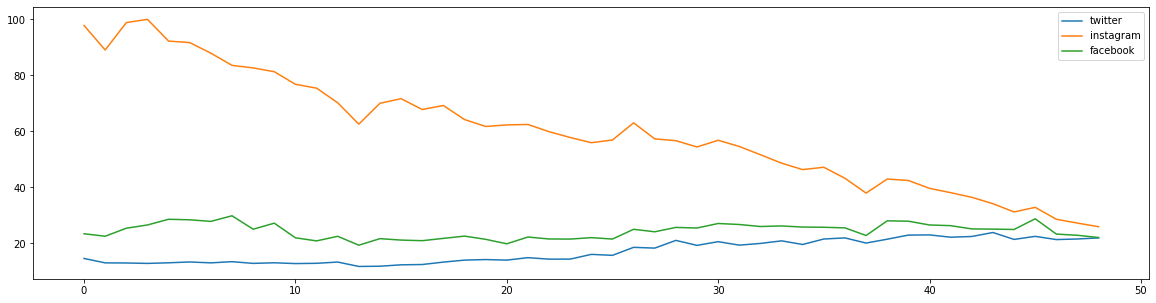

In [29]:
df.plot(figsize=(20,5))